# Notes
* Something to look into in the future is detecting the actual illuminated region with some clustering method
    * Perhaps with `DBSCAN`, or some `opencv` method like blob detection.

In [92]:
import numpy as np
import matplotlib.pyplot as plt 
import PIL
from PIL import Image, ImageOps
from sklearn.cluster import DBSCAN
import numpy
from sklearn import preprocessing
#numpy.set_printoptions(threshold=sys.maxsize)

plt.rcParams['font.family']='serif'
#plt.style.use('dark_background')

None
(400, 400)
L


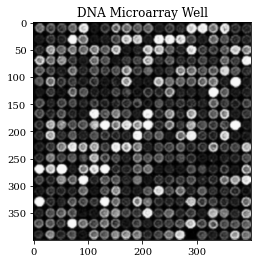

In [35]:
image = Image.open(r'C:\Users\Research\Documents\GitHub\genomics\exploring\first_topics\microarray_reading\microarray.png')

image = ImageOps.grayscale(image)

print(image.format)
print(image.size)
print(image.mode)

plt.imshow(image,cmap='Greys_r')
plt.title('DNA Microarray Well')
plt.show()

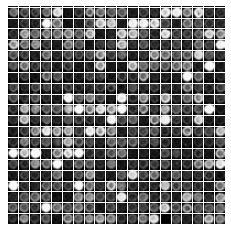

In [70]:
fig, ax = plt.subplots(figsize=(4,4))

'''
for i in np.arange(0,5,0.5):
    plt.axvline(x=i,lw=1,c='white')
    plt.axhline(y=i,lw=1,c='white')
'''
plt.axis('off')

x, y = image.size

xs = np.arange(0,x,20)

for i in xs: 
    ax.axvline(i,c='white',lw=1)
    ax.axhline(i,c='white',lw=1)

plt.imshow(image,cmap='Greys_r')

#plt.savefig('image.png', bbox_inches='tight',pad_inches = 0)

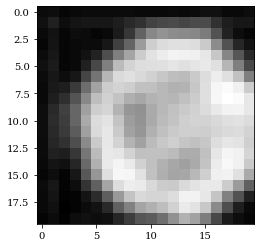

In [61]:
cell = image.crop((0,0,20,20))
plt.imshow(cell,cmap='Greys_r')

In [59]:
cell_arr = np.array(cell)
print(cell_arr.shape)
print(cell_arr[0:2])
print(np.mean(cell_arr))

(20, 20)
[[ 5  6  3  4  5  5  5  5  5  4  4  4  5  4  5  7  7  4  4  6]
 [ 7 14  6  9 10 10 10 13 17 20 26 28 29 27 29 29 20 13 10 10]]
55.06


In [96]:
x_bounds = np.arange(0,x,20)
y_bounds = x_bounds 

means = np.array([])

for x_index, x_bound in enumerate(x_bounds): 
    for y_index, y_bound in enumerate(y_bounds): 
        
        mean = np.mean(image.crop((x_bound,
                                   y_bound,
                                   x_bound+20,
                                   y_bound+20)))
        
        means = np.append(means,mean)

means = (means-np.mean(means))/np.std(means)




Text(0, 0.5, 'Count')

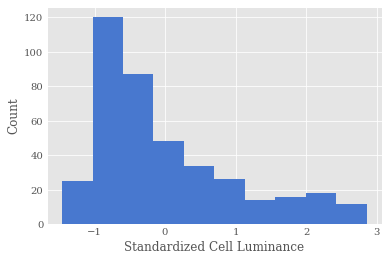

In [101]:
plt.style.use('seaborn-muted')
plt.rcParams['font.family']='serif'
plt.hist(means)
plt.xlabel('Standardized Cell Luminance')
plt.ylabel('Count')